In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
country = "US"

In [3]:
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_confirmed = pd.read_csv(data)

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816


In [33]:
df_confirmed_country = df_confirmed[df_confirmed['Country/Region'] == country]
df_confirmed_country.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
244,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,9199122,9281002,9404058,9507004,9632704,9757612,9886080,9995860,10115804,10256094


In [34]:
df_confirmed_country = pd.DataFrame(df_confirmed_country[df_confirmed_country.columns[4:]].sum(),columns=["confirmed"])
df_confirmed_country.head()

,confirmed
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5


In [37]:
df_confirmed_country.head(-1)

,confirmed
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
11/5/20,9632704
11/6/20,9757612
11/7/20,9886080
11/8/20,9995860


In [38]:
df_confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/1/20', '11/2/20', '11/3/20', '11/4/20', '11/5/20', '11/6/20',
       '11/7/20', '11/8/20', '11/9/20', '11/10/20'],
      dtype='object', length=294)

In [40]:
df_confirmed_country.index = pd.to_datetime(df_confirmed_country.index,format='%m/%d/%y')

In [41]:
df_confirmed_country.head()

,confirmed
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


<AxesSubplot:title={'center':'Covid confirmed cases in US'}>

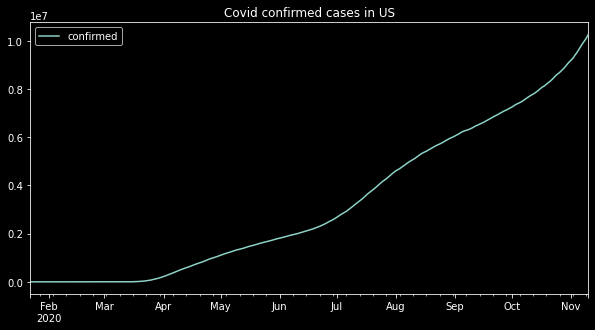

In [43]:
plt.style.use('dark_background')
df_confirmed_country.plot(figsize=(10,5),title='Covid confirmed cases in US')


In [44]:
df_confirmed_country.tail(10)

,confirmed
2020-11-01,9199122
2020-11-02,9281002
2020-11-03,9404058
2020-11-04,9507004
2020-11-05,9632704
2020-11-06,9757612
2020-11-07,9886080
2020-11-08,9995860
2020-11-09,10115804
2020-11-10,10256094


In [45]:
len(df_confirmed_country)

294

In [50]:
x = len(df_confirmed_country) - 14
train = df_confirmed_country[:x]
test = df_confirmed_country[x:]

In [51]:
train.tail()

,confirmed
2020-10-23,8480161
2020-10-24,8564037
2020-10-25,8625984
2020-10-26,8691979
2020-10-27,8767572


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [54]:
train_scaled[-10:]

array([[0.92782859],
       [0.93542282],
       [0.94237332],
       [0.94951715],
       [0.95780428],
       [0.96721886],
       [0.97678547],
       [0.98385094],
       [0.99137811],
       [1.        ]])

In [55]:
print(train_scaled.shape,test_scaled.shape)

(280, 1) (14, 1)


In [57]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [59]:
delay = 7
n_features = 1
train_generator = TimeseriesGenerator(train_scaled,train_scaled,length=delay,batch_size=1)
print(len(train_scaled),len(train_generator))

280 273


In [60]:
x,y = train_generator[0]
print(x,y)

[[[0.00000000e+00]
  [0.00000000e+00]
  [1.14056675e-07]
  [1.14056675e-07]
  [4.56226702e-07]
  [4.56226702e-07]
  [4.56226702e-07]]] [[5.70283377e-07]]


In [61]:
test_generator = TimeseriesGenerator(test_scaled,test_scaled,length=delay,batch_size=1)
print(len(test_scaled),len(test_generator))

14 7


In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [63]:
model = Sequential()
model.add(LSTM(150,activation='relu',return_sequences=True,input_shape=(delay,n_features)))
model.add(LSTM(64,activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 150)            91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [69]:
callbacks_list = [
    ModelCheckpoint('my_model.h5',save_best_only=True,monitor='val_loss')
]

In [70]:
history = model.fit(train_generator,epochs=50,steps_per_epoch=273,validation_data=test_generator,callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 273 steps, validate for 7 steps
Epoch 1/50
273/273 [==============================] - 4s 16ms/step - loss: 0.0017 - val_loss: 0.0064
Epoch 2/50
273/273 [==============================] - 4s 16ms/step - loss: 8.4956e-05 - val_loss: 5.3261e-04
Epoch 3/50
273/273 [==============================] - 5s 17ms/step - loss: 4.1265e-04 - val_loss: 0.0081
Epoch 4/50
273/273 [==============================] - 4s 15ms/step - loss: 1.8949e-04 - val_loss: 0.0012
Epoch 5/50
273/273 [==============================] - 4s 15ms/step - loss: 3.1676e-04 - val_loss: 0.0032
Epoch 6/50
273/273 [==============================] - 4s 16ms/step - loss: 1.5079e-04 - val_loss: 2.7351e-05
Epoch 7/50
273/273 [==============================] - 4s 16ms/step - loss: 7.9224e-05 - val_loss: 7.3816e-04
Epoch 8/50
273/273 [==============================] - 4s 16ms/step - loss: 0.0012 - val_loss: 1.9478e-04
Epoch 9/50
273/273 [==============================] - 5s 17m

KeyboardInterrupt: 

In [71]:
model.load_weights('my_model.h5')

In [73]:
model.evaluate(test_generator)

  ...
    to  
  ['...']
7/7 [==============================] - 0s 7ms/step - loss: 2.7351e-05


2.735091191295526e-05

In [77]:
predictions = []

In [75]:
current_batch = train_scaled[-delay:]
current_batch = current_batch.reshape(1,delay,n_features)
current_batch.shape

(1, 7, 1)

In [78]:
future = 7
for i in range(future):
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [80]:
rescaled_predictions = scaler.inverse_transform(predictions)

In [81]:
time_series_array = test.index

In [83]:
for i in range(future):
    time_series_array = time_series_array.append(time_series_array[-1:]+pd.DateOffset(1))

In [82]:
test.index

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10'],
              dtype='datetime64[ns]', freq=None)

In [84]:
time_series_array

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17'],
              dtype='datetime64[ns]', freq=None)

In [90]:
df_forecast = pd.DataFrame(columns=["actual_confirmed","predicted"],index=test.index[:7])

In [91]:
df_forecast.loc[:,"predicted"] = rescaled_predictions[:,0]
df_forecast.loc[:,"actual_confirmed"] = test["confirmed"]

In [87]:
len(rescaled_predictions)

7

<AxesSubplot:title={'center':'Actual vs Predicted cases'}>

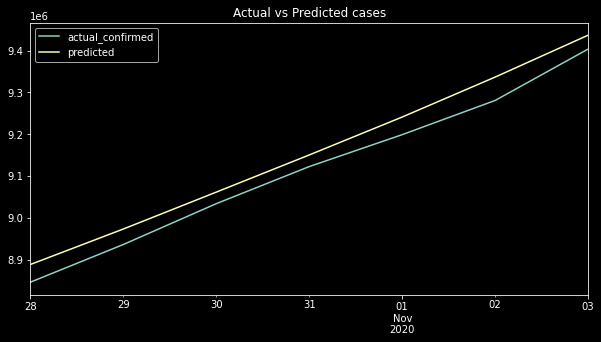

In [92]:
df_forecast.plot(figsize=(10,5),title="Actual vs Predicted cases")

In [105]:
predictions = []
future = 70
current_batch = train_scaled[-delay:]
current_batch = current_batch.reshape(1,delay,n_features)
for i in range(future):
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [93]:
time_series_array = test.index

In [94]:
time_series_array

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10'],
              dtype='datetime64[ns]', freq=None)

In [95]:
len(time_series_array)

14

In [96]:
for i in range(56):
    time_series_array = time_series_array.append(time_series_array[-1:]+pd.DateOffset(1))
len(time_series_array)

70

In [97]:
time_series_array

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
               '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
      

In [106]:
print(predictions[:5])

[array([1.013753], dtype=float32), array([1.023444], dtype=float32), array([1.0335226], dtype=float32), array([1.0436711], dtype=float32), array([1.0540315], dtype=float32)]


In [107]:
rescaled_predictions = scaler.inverse_transform(predictions)

In [108]:
len(rescaled_predictions)

70

In [109]:
df_predicted = pd.DataFrame(columns=['predicted'],index=time_series_array)
df_predicted.loc[:,'predicted'] = rescaled_predictions.reshape(-1)

<AxesSubplot:title={'center':'Predicted COVID confirmed cases in US for next 2 months'}>

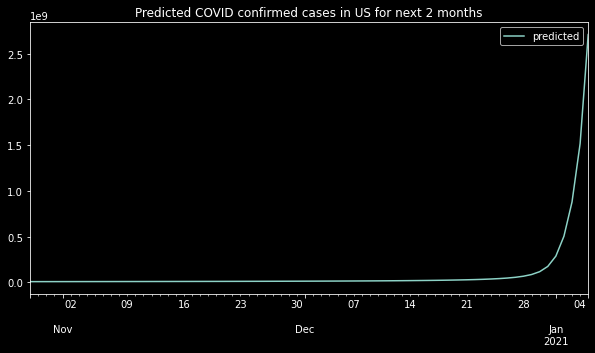

In [111]:
df_predicted.plot(figsize=(10,5),title='Predicted COVID confirmed cases in US for next 2 months')